In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show
from minisom import MiniSom
from sklearn.preprocessing import scale
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X=iris.data
X = scale(X)
y=iris.target

In [3]:
variables=['Longitud sépalo', 'Anchura sépalo', 'Longitud pétalo', 'Anchura pétalo'] 

In [4]:
size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=111)
som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.17992486951682304


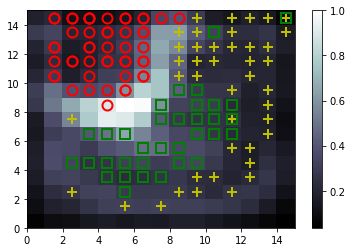

In [5]:
bone()
pcolor(som.distance_map().T) 
colorbar()
markers = ['o', '+', 's']
colors = ['r', 'y', 'g']

for i, x in enumerate(X):
    BMU = som.winner(x) # winning node is the Best Matching Unit BMU
    plot(BMU[0] + 0.5,
         BMU[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.savefig("SOM_etiquetas.pdf")
show()

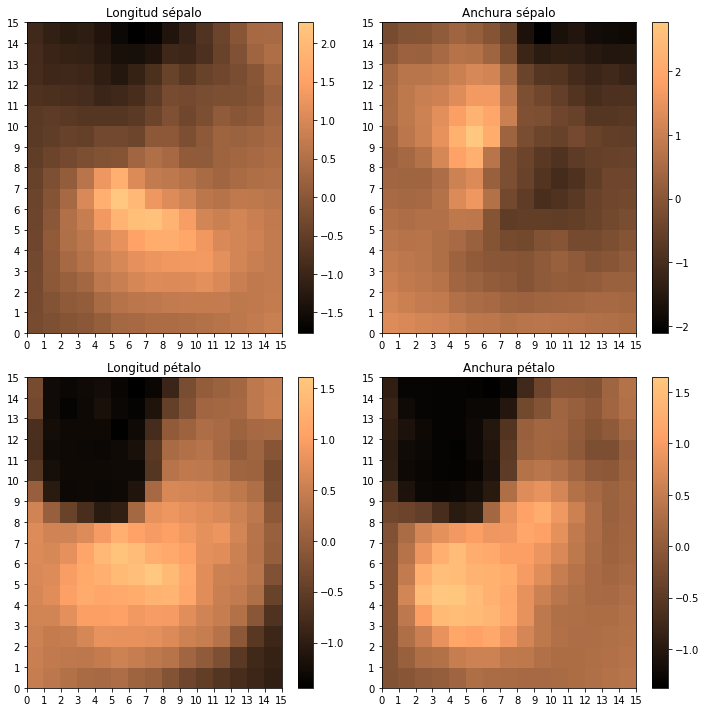

In [6]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='copper')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    colorbar()
plt.tight_layout()
plt.savefig("componentes_SOM.pdf")
plt.show()
